In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
#membaca file
df = pd.read_csv("/content/drive/My Drive/Data Set/telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [36]:
#summary info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [37]:
#columns
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [38]:
# Check Duplicates
df.duplicated().sum()

0

In [39]:
## Check the proportion of 0 and 1 in Churn label
df["Churn"].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


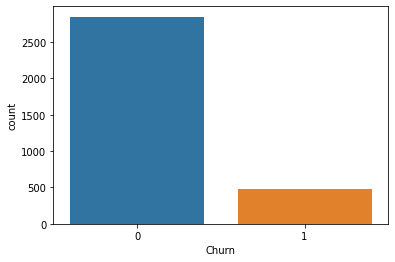

In [40]:
# visualiasi churn
sns.countplot(df["Churn"])

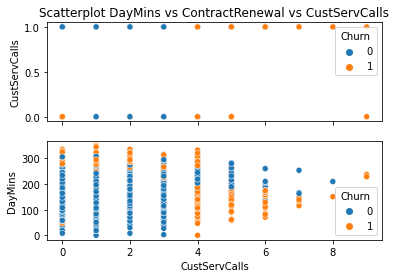

In [42]:
#scatterplot 1
ax = plt.subplot(211)
ax = sns.scatterplot(data=df, x=df['CustServCalls'], y = df['ContractRenewal'], hue=df['Churn'])
ax = plt.tick_params('x', labelbottom=False)
ax = plt.xlabel('')
ax = plt.ylabel('CustServCalls')

# judul
plt.title('Scatterplot DayMins vs ContractRenewal vs CustServCalls')

#scatterplot 2
ax1 = plt.subplot(212)
ax1 = sns.scatterplot(data=df, x=df['CustServCalls'], y = df['DayMins'], hue=df['Churn'])
ax1 = plt.xlabel('CustServCalls')
ax1 = plt.ylabel('DayMins')

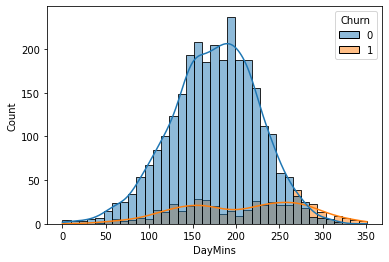

In [53]:
# menumpukan 2 histogram dalam 1 grafik dengan penyajian yang beda warna berdasarkan kolom churn
sns.histplot( data = df, x = df["DayMins"], hue = df["Churn"], multiple="layer", kde = True )

Text(0.5, 1.0, 'korelasi')

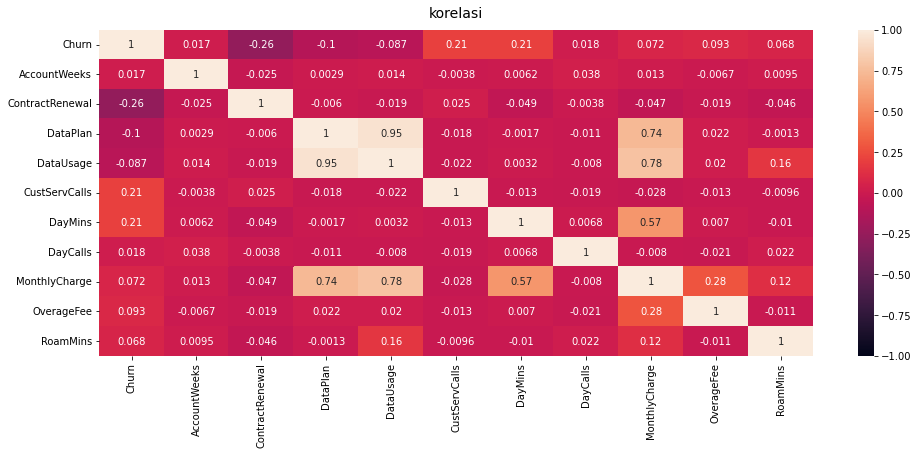

In [41]:
#heatmap
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)
heatmap.set_title("korelasi",fontdict={"fontsize":14}, pad=12)

In [43]:
# data modeling
df = df[["ContractRenewal", "DataPlan", "CustServCalls", "DayMins","Churn"]]
df

,ContractRenewal,DataPlan,CustServCalls,DayMins,Churn
0,1,1,1,265.1,0
1,1,1,1,161.6,0
2,1,0,0,243.4,0
3,0,0,2,299.4,0
4,0,0,3,166.7,0
...,...,...,...,...,...
3328,1,1,2,156.2,0
3329,1,0,3,231.1,0
3330,1,0,2,180.8,0
3331,0,0,2,213.8,0


In [44]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'Churn']
y = df["Churn"]

In [45]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

Model

In [46]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)

In [47]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

Evaluation

In [48]:
y_lr = lr.predict(X_test)
y_rf = classifier_rf.predict(X_test)

In [49]:
# akurasi
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_rf))

0.8508245877061469
0.8883058470764618


In [50]:
# AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1)
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) 
print(auc(fpr, tpr))

0.5558578745198464
0.7071418409446578


In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1136
           1       0.49      0.14      0.21       198

    accuracy                           0.85      1334
   macro avg       0.68      0.56      0.57      1334
weighted avg       0.81      0.85      0.81      1334

              precision    recall  f1-score   support

           0       0.91      0.96      0.94      1136
           1       0.69      0.45      0.54       198

    accuracy                           0.89      1334
   macro avg       0.80      0.71      0.74      1334
weighted avg       0.88      0.89      0.88      1334

